In [1]:
# Load packages.
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt   
%matplotlib inline  

In [2]:
# Read data into pandas dataframe.
bl = pd.read_csv('TACOMA_BUSINESS_LICENSE.csv')

In [3]:
# Convert date to datetime format.
bl['BUSINESS OPEN DATE'] = pd.to_datetime(bl['BUSINESS OPEN DATE'])

In [4]:
# Remove businesses with open date after "today".
bl = bl[bl['BUSINESS OPEN DATE'] <='2017-05-04']

In [5]:
tacoma_zip_codes = [98402, 98403, 98404,  98405, 98406, 98407, 
                    98408, 98409, 98418, 98421, 98422, 98465]

In [6]:
# Clean up ZIP code data.
# Remove extra numbers after first 5 digits and remove non-numeric ZIP codes.
bl['ZIP CODE 5 string'] = bl['ZIP CODE'].str[:5]
# If zip code contains any characters, replace it with 00000
bl.loc[bl['ZIP CODE 5 string'].str.contains('[a-zA-Z]'), 'ZIP CODE 5 string']  = '00000' 
# Create another zip code column that has integer format.
bl['ZIP CODE 5 int'] = bl['ZIP CODE 5 string'].astype(int)

In [7]:
# Create new column which contains only first two digits of NAICS CODE.
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE'].fillna('00')
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE FIRST TWO'].astype(str)
bl['NAICS CODE FIRST TWO'] = bl['NAICS CODE FIRST TWO'].str[:2]

In [8]:
# Count up the number of licenses for each NAICS CODE 2 digit grouping.
bl_groupedbynaicsfirst2 = bl.groupby('NAICS CODE FIRST TWO')['BUSINESS NAME'].count()
sorted = bl_groupedbynaicsfirst2.sort_values()

In [9]:
# How many unique NAICS 2 digits codes are there in this dataset?
naics_keys = sorted.keys()

In [10]:
# Create the dataset to be used in the k-modes clustering algorithm
# Create new column with open year.
bl['BUSINESS OPEN YEAR'] = bl['BUSINESS OPEN DATE'].dt.year

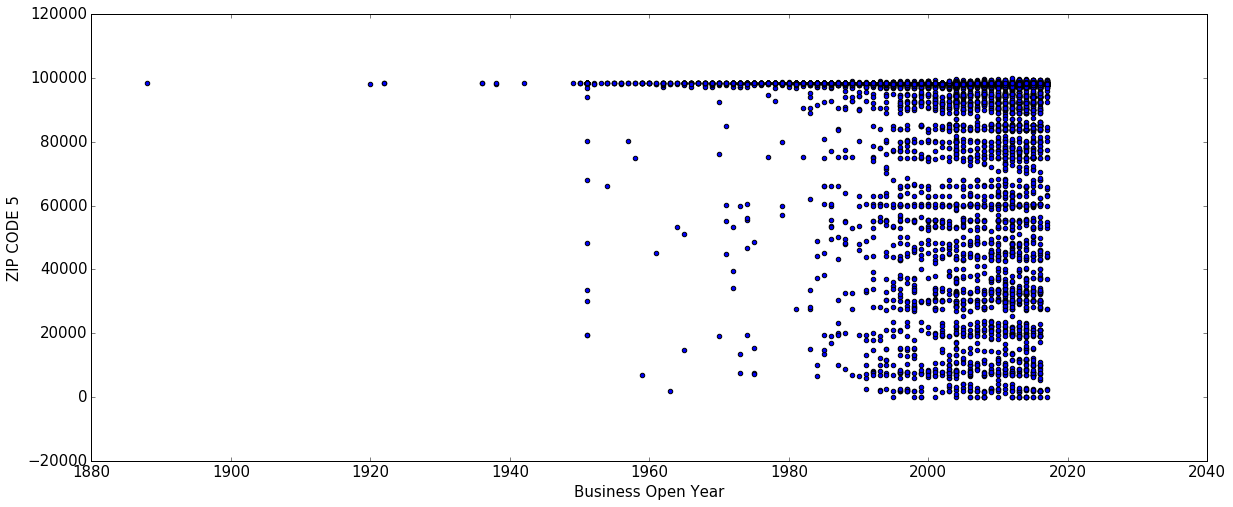

In [11]:
# ZIP code vs business open year
ax = bl.plot.scatter(x="BUSINESS OPEN YEAR", y = "ZIP CODE 5 int", figsize=(20,8), fontsize = 15, legend = False);
ax.set_xlabel('Business Open Year', fontsize = 15)
ax.set_ylabel('ZIP CODE 5', fontsize = 15);

In [12]:
# Create dictionaries to store the data from the k-modes algorithm.
cluster_dict = {}
kproto_dict = {}

In [13]:
# To use the data in the pickle file, read it in here.
import pickle   
cluster_info = pickle.load(open('cluster_data.p', 'rb'))

In [14]:
# Print cluster centroid: year, NAICS ID, and ZIP code
year = cluster_info[5][2][0]
IDZIP = cluster_info[5][2][1]
print 'Year NAICS  ZIP'
for i in range(len(year)):
    print int(year[i][0]), IDZIP[i][0], '   ', IDZIP[i][1]

Year NAICS  ZIP
2015 48     98409
1993 23     98409
2004 53     98409
2011 53     98409
1972 42     98409


In [15]:
# First, assign each business in the dataframe to a cluster.
bl['cluster_num'] = cluster_info[5][3]

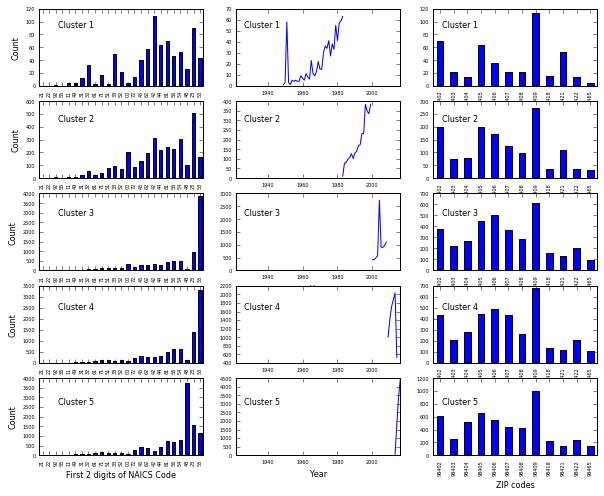

In [16]:
xaxisorderkeys = naics_keys
xaxisorderyears = range(1922,2017)

plt.figure(figsize = (10,8))  #w,h
numplots = 5
# Clusters arranged in approximate chronological order.
plot_order = [4,1,2,3,0]
for i in range(numplots):
    clustername = 'Cluster ' + str(i+1)
    current_cluster = bl[bl['cluster_num']==plot_order[i]]

    plt.subplot(numplots, 3, (i+2*i)+1)
    current_cluster['NAICS CODE FIRST TWO'].value_counts().reindex(xaxisorderkeys).plot(
        kind='bar', fontsize = 5)
    plt.ylabel('Count', fontsize = 8)
    plt.xlabel('First 2 digits of NAICS Code', fontsize = 8)

    plt.subplot(numplots, 3, (i+2*i)+2)
    current_cluster['BUSINESS OPEN YEAR'].value_counts().reindex(xaxisorderyears).plot(
        kind='line', fontsize = 5)
    plt.xlabel('Year', fontsize = 8)

    plt.subplot(numplots, 3, (i+2*i)+3)
    current_cluster['ZIP CODE 5 int'].value_counts().reindex(tacoma_zip_codes).plot(
        kind='bar', fontsize = 5)
    plt.xlabel('ZIP codes', fontsize = 8)

    plt.text(-0.1,0.79-0.19*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 8)
    plt.text(0.05,0.79-0.19*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 8)
    plt.text(0.21,0.79-0.19*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 8)

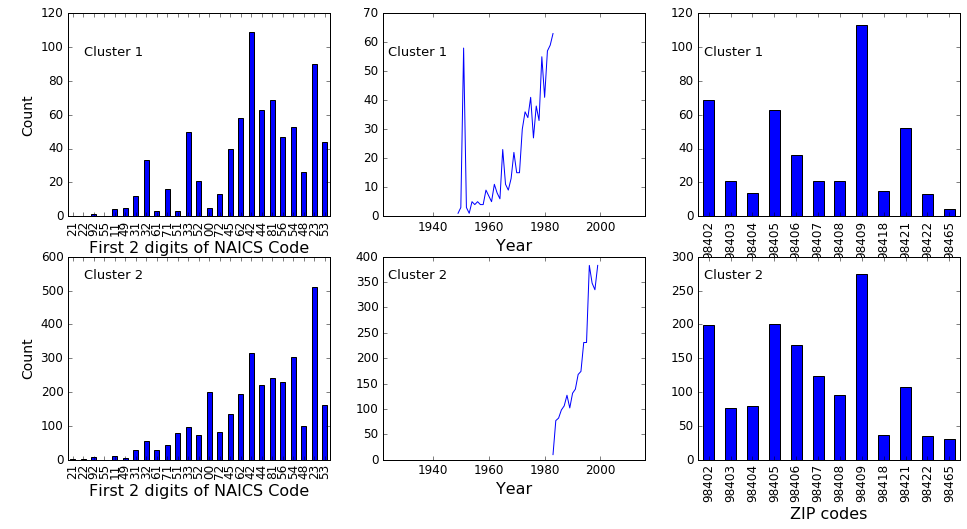

In [17]:
# Visualize Cluster 1-2
xaxisorderkeys = naics_keys
xaxisorderyears = range(1922,2017)

plt.figure(figsize = (16,8))  #w,h
numplots = 2
# Clusters arranged in approximate chronological order.
plot_order = [4,1,2,3,0]
for i in range(numplots):
    clustername = 'Cluster ' + str(i+1)
    current_cluster = bl[bl['cluster_num']==plot_order[i]]

    plt.subplot(numplots, 3, (i+2*i)+1)
    current_cluster['NAICS CODE FIRST TWO'].value_counts().reindex(xaxisorderkeys).plot(
        kind='bar', fontsize = 12)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('First 2 digits of NAICS Code', fontsize = 16)

    plt.subplot(numplots, 3, (i+2*i)+2)
    current_cluster['BUSINESS OPEN YEAR'].value_counts().reindex(xaxisorderyears).plot(
        kind='line', fontsize = 12)
    plt.xlabel('Year', fontsize = 16)

    plt.subplot(numplots, 3, (i+2*i)+3)
    current_cluster['ZIP CODE 5 int'].value_counts().reindex(tacoma_zip_codes).plot(
        kind='bar', fontsize = 12)
    plt.xlabel('ZIP codes', fontsize = 16)

    plt.text(-0.07,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)
    plt.text(0.175,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)
    plt.text(0.43,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)

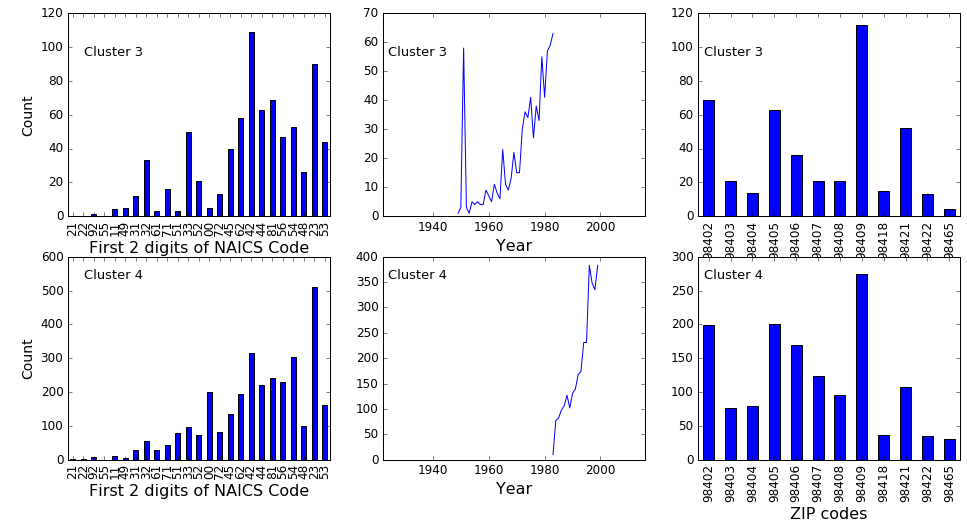

In [18]:
# Visualize Cluster 3-4
xaxisorderkeys = naics_keys
xaxisorderyears = range(1922,2017)

plt.figure(figsize = (16,8))  #w,h
numplots = 2
# Clusters arranged in approximate chronological order.
plot_order = [4,1,2,3,0]
for i in range(numplots):
    clustername = 'Cluster ' + str(i+3)
    current_cluster = bl[bl['cluster_num']==plot_order[i]]

    plt.subplot(numplots, 3, (i+2*i)+1)
    current_cluster['NAICS CODE FIRST TWO'].value_counts().reindex(xaxisorderkeys).plot(
        kind='bar', fontsize = 12)
    plt.ylabel('Count', fontsize = 14)
    plt.xlabel('First 2 digits of NAICS Code', fontsize = 16)

    plt.subplot(numplots, 3, (i+2*i)+2)
    current_cluster['BUSINESS OPEN YEAR'].value_counts().reindex(xaxisorderyears).plot(
        kind='line', fontsize = 12)
    plt.xlabel('Year', fontsize = 16)

    plt.subplot(numplots, 3, (i+2*i)+3)
    current_cluster['ZIP CODE 5 int'].value_counts().reindex(tacoma_zip_codes).plot(
        kind='bar', fontsize = 12)
    plt.xlabel('ZIP codes', fontsize = 16)

    plt.text(-0.07,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)
    plt.text(0.175,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)
    plt.text(0.43,0.8-0.45*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 13)

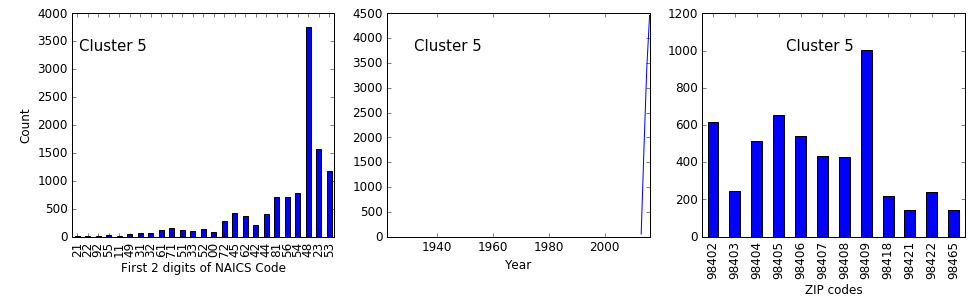

In [19]:
# Visualize Cluster 5
xaxisorderkeys = naics_keys
xaxisorderyears = range(1922,2017)

plt.figure(figsize = (16,4))  #w,h
numplots = 1
# Clusters arranged in approximate chronological order.
plot_order = [0]
for i in range(numplots):
    clustername = 'Cluster ' + str(i+5)
    current_cluster = bl[bl['cluster_num']==plot_order[i]]

    plt.subplot(numplots, 3, (i+2*i)+1)
    current_cluster['NAICS CODE FIRST TWO'].value_counts().reindex(xaxisorderkeys).plot(
        kind='bar', fontsize = 12)
    plt.ylabel('Count', fontsize = 12)
    plt.xlabel('First 2 digits of NAICS Code', fontsize = 12)
    plt.text(-0.07,0.36-0.34*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 15)
    
    plt.subplot(numplots, 3, (i+2*i)+2)
    current_cluster['BUSINESS OPEN YEAR'].value_counts().reindex(xaxisorderyears).plot(
        kind='line', fontsize = 12)
    plt.xlabel('Year', fontsize = 12)
    plt.text(0.2,0.36-0.34*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 15)    
        
    plt.subplot(numplots, 3, (i+2*i)+3)
    current_cluster['ZIP CODE 5 int'].value_counts().reindex(tacoma_zip_codes).plot(
        kind='bar', fontsize = 12)
    plt.xlabel('ZIP codes', fontsize = 12)
    plt.text(0.5,0.36-0.34*i,clustername, horizontalalignment='center', 
             verticalalignment='center',transform=ax.transAxes, fontsize = 15)